In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from DarkNews import plot_tools as pt
from fastbnb import plot_tools as pt2

In [22]:
# Experimenting with new limits for the plots
coupl_boundaries = {0.03: (1e-11, 1e-4), 
                    0.06: (1e-11, 1e-3), 
                    0.1: (1e-11, 1e-5), 
                    0.2: (1e-10, 1e-4), 
                    0.5: (1e-8, 1e-2),
                    0.8: (1e-8, 1e-2),
                    1.25: (1e-8, 1e-1) }

## Coupling plots with  all fits for Mz' on the same plane

0.03
0.06
0.1
0.2
0.5
0.8
1.25


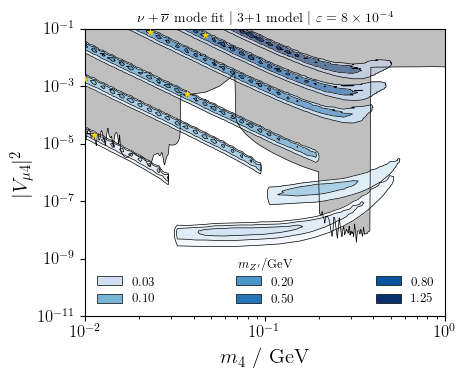

In [6]:
path = '../results/3p1_coupling_0.0008/'
path_data = path+f'5m_18d_20h_51m_15s_'
f = open(path_data+'chi2.dat', 'r')
header = f.readline().replace('# ', '').split()
data = pd.read_csv(f, sep='\s+', names=header, dtype=float)

mzprimearray = data['mzprime'].unique()
mzprimearray.sort()


my_cmap = cm.Blues(np.linspace(0.2, 1, len(mzprimearray)))
colors = {mz: my_cmap[i] for i, mz in enumerate(mzprimearray)}

fig, ax = pt.std_fig()

chi2 = "chi2_mb_fhc"
legends=[]
for mzprime in mzprimearray:
    print(mzprime)
    if mzprime == 0.06:
        continue
    data_enu = data[(data.mzprime == mzprime) & (data.v_mu4 < 1)]
    levels = [0, 2.30, 6.18, 11.83]
    # levels = [0, 1.00, 4.00, 9.00]

    x = data_enu.m4.values
    y = data_enu.v_mu4.values ** 2
    z = (data_enu[chi2] - data_enu[chi2].min())
    w = data_enu.decay_length.values

    xlabel = r'$m_4 \ /$ GeV'
    ylabel = r'$|V_{\mu 4}|^2$'
    marker1 = '*'

    kwargs_interp = {'fine_gridx': 40, 'fine_gridy':500, 'logx':True, 'logy':True}
    X, Y, Z = pt2.interp_grid(x, y, z, **kwargs_interp)

    cs = ax.contourf(X,Y,Z,levels=levels,cmap=pt2.build_cmap(colors[mzprime]))
    cs2 = ax.contour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
    
    color = cs.collections[1].get_facecolor()[0]
    legends.append(plt.Rectangle((0,0),1,1, fc = colors[mzprime], ec='black', lw=0.5, label = rf'{mzprime:.2f}'))
    
    ax.scatter(x[np.argmin(z)], y[np.argmin(z)], color='gold', lw=0.5, marker=marker1, s=20, zorder=5)

m4,umu4sqr = np.load('other_limits/Umu4_inv.npy')
m4 *= 1e-3
ax.fill_between(m4, umu4sqr, np.ones(len(umu4sqr)), color='grey', alpha=0.5, lw =0, zorder=-1)
ax.plot(m4,umu4sqr, color='black', lw=0.5)

leg1 = ax.legend(legends, 
                 [l.get_label() for l in legends], 
                 title=r'$m_{Z^\prime}/$GeV',
                 loc='lower left', ncol=3, fontsize=9, title_fontsize=9,
                 frameon=False,  fancybox=False, alignment='center', mode='expand',
                 facecolor='None', edgecolor='black')

ax.set_title(rf'$\nu + \overline{{\nu}}$ mode fit $\vert$ 3+1 model $\vert$ $\varepsilon = 8 \times 10^{{-4}}$',fontsize=10)

ax.set_xlabel(xlabel,fontsize=15)
ax.set_ylabel(ylabel,fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(x.min(),x.max())
ax.set_ylim(1e-11,1e-1)
fig.savefig(f'plots/fit_3p1_couplings_allmzs_{chi2}.png', bbox_inches='tight', dpi=400)

0.03
0.06
0.1
0.2
0.5
0.8
1.25
0.03
0.06
0.1
0.2
0.5
0.8
1.25
0.03
0.06
0.1
0.2
0.5
0.8
1.25


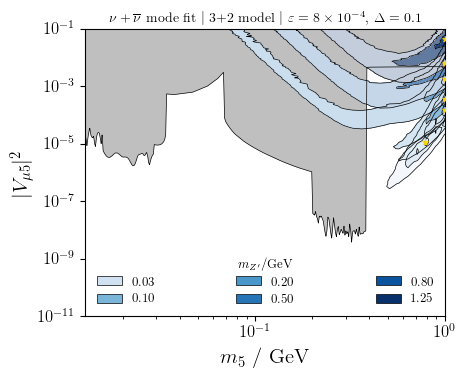

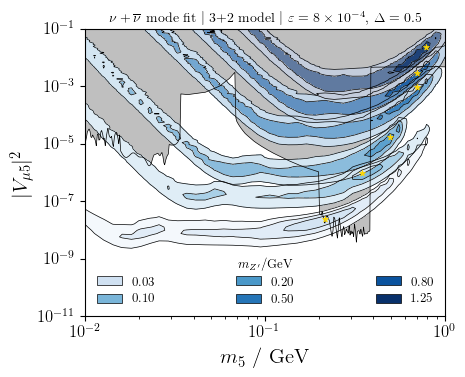

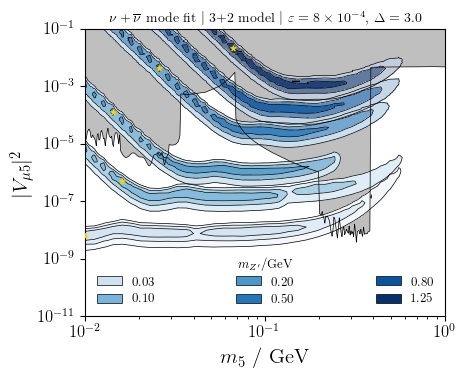

In [14]:
for delta, name in zip(['0.10', '0.50', '3.00'], ['5m_18d_20h_51m_20s_', '5m_18d_20h_51m_21s_', '5m_18d_20h_51m_21s_']):
    path = f'../results/3p2_coupling_0.0008_delta_{delta}/'
    path_data = path+name
    f = open(path_data+'chi2.dat', 'r')
    header = f.readline().replace('# ', '').split()
    data = pd.read_csv(f, sep='\s+', names=header, dtype=float)

    mzprimearray = data['mzprime'].unique()
    mzprimearray.sort()

    coupl_boundaries = {0.03: (1e-11, 1e-4), 
                        0.06: (1e-11, 1e-3), 
                        0.1: (1e-11, 1e-5), 
                        0.2: (1e-10, 1e-4), 
                        0.5: (1e-8, 1e-2),
                        0.8: (1e-8, 1e-2),
                        1.25: (1e-8, 1e-1) }

    from matplotlib.pyplot import cm
    my_cmap = cm.Blues(np.linspace(0.2, 1, len(mzprimearray)))
    colors = {mz: my_cmap[i] for i, mz in enumerate(mzprimearray)}

    fig, ax = pt.std_fig()

    chi2 = "chi2_mb_fhc"
    legends=[]
    for mzprime in mzprimearray:
        print(mzprime)
        if mzprime == 0.06:
            continue
        data_enu = data[(data.mzprime == mzprime) & (data.v_mu5 < 1)]
        levels = [0, 2.30, 6.18, 11.83]
        # levels = [0, 1.00, 4.00, 9.00]

        x = data_enu.m5.values
        y = data_enu.v_mu5.values ** 2
        z = (data_enu[chi2] - data_enu[chi2].min())
        w = data_enu.decay_length.values

        xlabel = r'$m_5 \ /$ GeV'
        ylabel = r'$|V_{\mu 5}|^2$'
        marker1 = '*'

        kwargs_interp = {'fine_gridx': 40, 'fine_gridy':500, 'logx':True, 'logy':True}
        X, Y, Z = pt2.interp_grid(x, y, z, **kwargs_interp)

        cs = ax.contourf(X,Y,Z,levels=levels,cmap=build_cmap(colors[mzprime]))
        cs2 = ax.contour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)
        
        color = cs.collections[1].get_facecolor()[0]
        legends.append(plt.Rectangle((0,0),1,1, fc = colors[mzprime], ec='black', lw=0.5, label = rf'{mzprime:.2f}'))
        
        # X, Y, Z_sbnd = pt2.interp_grid(x, y, data_enu['sbnd_n_events'], **kwargs_interp)
        # X, Y, Z_microb = pt2.interp_grid(x, y, data_enu['microb_n_events'], **kwargs_interp)
        # X, Y, Z_icarus = pt2.interp_grid(x, y, data_enu['icarus_n_events'], **kwargs_interp)
        # cs2 = ax.contour(X, Y, Z_sbnd, levels=[1000], colors='orange',linewidths=1.0)
        # cs2 = ax.contour(X, Y, Z_microb, levels=[1000], colors='black',linewidths=1.0)
        # cs2 = ax.contour(X, Y, Z_icarus, levels=[1000], colors='green',linewidths=1.0)

        ax.scatter(x[np.argmin(z)], y[np.argmin(z)], color='gold', lw=0.5, marker=marker1, s=20, zorder=5)

    m4,umu4sqr = np.load('other_limits/Umu4_inv.npy')
    m4 *= 1e-3
    ax.fill_between(m4, umu4sqr, np.ones(len(umu4sqr)), color='grey', alpha=0.5, lw =0, zorder=-1)
    ax.plot(m4,umu4sqr, color='black', lw=0.5)

    leg1 = ax.legend(legends, 
                    [l.get_label() for l in legends], 
                    title=r'$m_{Z^\prime}/$GeV',
                    loc='lower left', ncol=3, fontsize=9, title_fontsize=9,
                    frameon=False,  fancybox=False, alignment='center', mode='expand',
                    facecolor='None', edgecolor='black')

    ax.set_title(rf'$\nu + \overline{{\nu}}$ mode fit $\vert$ 3+2 model $\vert$ $\varepsilon = 8 \times 10^{{-4}}$, $\Delta = {delta[:-1]}$',fontsize=10)

    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel(ylabel,fontsize=15)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(1e-11,1e-1)
    fig.savefig(f'plots/fit_3p2_couplings_allmzs_{chi2}_{delta}.png', bbox_inches='tight', dpi=400)

## Individual coupling plots

0.03
0.06
0.1
0.2
0.5
0.8
1.25


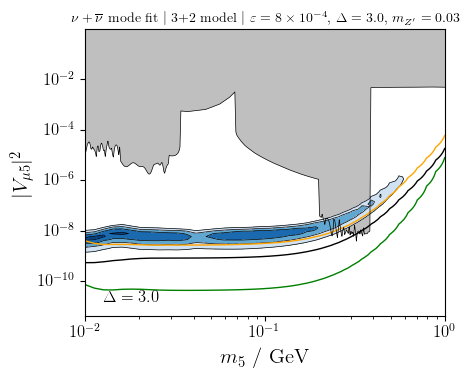

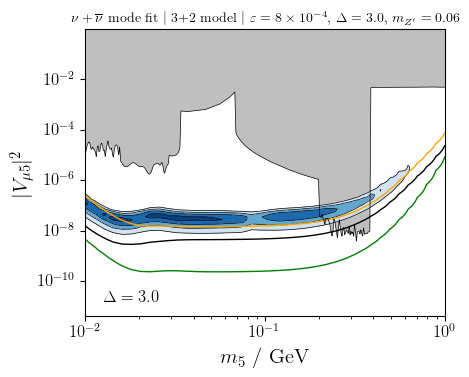

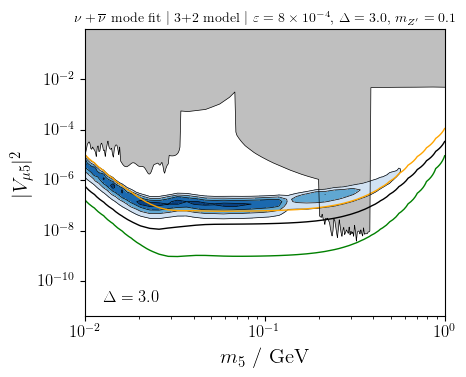

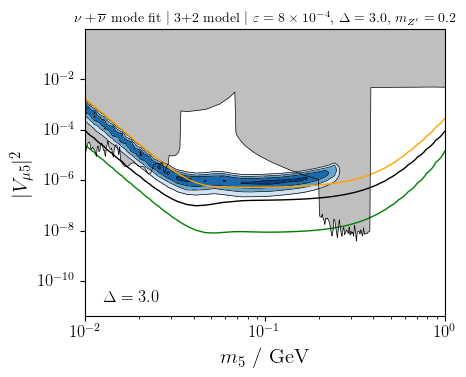

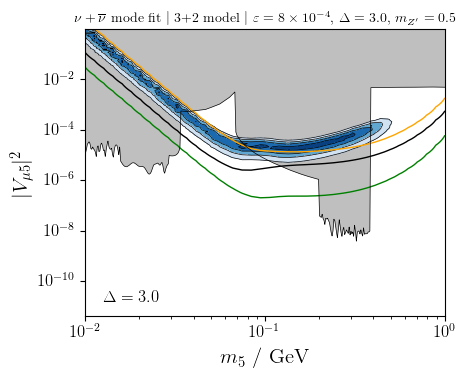

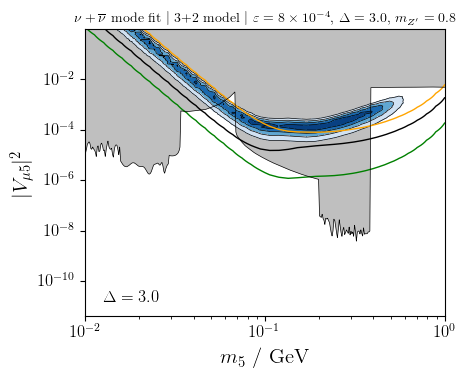

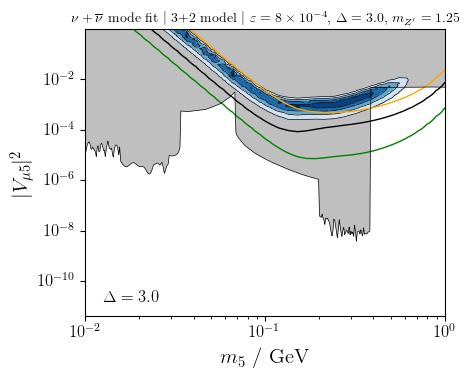

In [21]:
path = '../results/3p2_coupling_0.0008_delta_3.00/'
path_data = path+f'5m_18d_20h_51m_21s_'
f = open(path_data+'chi2.dat', 'r')
header = f.readline().replace('# ', '').split()
data = pd.read_csv(f, sep='\s+', names=header, dtype=float)

mzprimearray = data['mzprime'].unique()
mzprimearray.sort()

chi2 = "chi2_mb_comb"
for i in range(len(mzprimearray)):

    mzprime = mzprimearray[i]
    print(mzprime)
    data_enu = data[(data.mzprime == mzprime) & (data.v_mu5 < 1)]
    levels = [0, 2.30, 6.18, 11.83, 19.33]
    delta = data_enu.delta.values[0]

    x = data_enu.m5.values
    y = data_enu.v_mu5.values ** 2
    z = (data_enu[chi2] - data_enu[chi2].min())

    kwargs_interp = {'fine_gridx':40,'fine_gridy':500,'logx':True,'logy':True}
    
    X, Y, Z = pt2.interp_grid(x,y,z,**kwargs_interp)
    X, Y, Z_sbnd = pt2.interp_grid(x,y,data_enu['sbnd_n_events'],**kwargs_interp)
    X, Y, Z_microb = pt2.interp_grid(x,y,data_enu['microb_n_events'],**kwargs_interp)
    X, Y, Z_icarus = pt2.interp_grid(x,y,data_enu['icarus_n_events'],**kwargs_interp)

    W = data_enu.decay_length.values
    xlabel = r'$m_5 \ /$ GeV'
    ylabel = r'$|V_{\mu 5}|^2$'
    marker1 = '*'

    fig, ax = pt.std_fig()

    cs = ax.contourf(X,Y,Z,levels=levels,cmap='Blues_r')
    cs2 = ax.contour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)

    cs2 = ax.contour(X, Y, Z_sbnd, levels=[1000], colors='orange',linewidths=1.0)
    cs2 = ax.contour(X, Y, Z_microb, levels=[1000], colors='black',linewidths=1.0)
    cs2 = ax.contour(X, Y, Z_icarus, levels=[1000], colors='green',linewidths=1.0)
    # ax.plot(X[np.argmin(Z)],Y[np.argmin(Z)],color='orange',marker=marker1,markersize=12)
    
    m4,umu4sqr = np.load('other_limits/Umu4_inv.npy')
    m4 *= 1e-3
    ax.fill_between(m4, umu4sqr, np.ones(len(umu4sqr)), color='grey', alpha=0.5, lw =0, zorder=-1)
    ax.plot(m4,umu4sqr, color='black', lw=0.5)

    ax.set_title(rf'$\nu + \overline{{\nu}}$ mode fit $\vert$ 3+2 model $\vert$ $\varepsilon = 8 \times 10^{{-4}}$, $\Delta = {delta:.1f}$, $m_{{Z^\prime}} = {mzprime}$',fontsize=10)
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel(ylabel,fontsize=15)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(X.min(),X.max())
    ax.set_ylim(Y.min(),Y.max())

    fig.savefig(f'plots/fit_3p2_couplings_sbn_{mzprime:.2e}_{delta}_{chi2}.png', bbox_inches='tight', dpi=400)

## Some tests for the light Z' case

In [234]:
import scipy
def plot_band(ax, mheavy, y, nevents, chi2, color_l, color, ls=1, alpha=0.1, label='', Nint=100):
    mheavyl = np.log10(mheavy)
    yl = np.log10(y)
    xi = np.logspace(mheavyl.min(), mheavyl.max(), Nint)
    yi = np.logspace(yl.min(), yl.max(), Nint)

    zi = scipy.interpolate.griddata((mheavy, y), chi2,\
                                    (xi[None,:], yi[:,None]),\
                                    method='linear', fill_value="Nan", rescale=True)

    Contour = ax.contour(xi, yi, zi, [4.61], colors=['None'], linewidths=0, alpha=alpha)

    l1 = Contour.collections[0].get_paths()[0].vertices  # grab the 1st path

    xint = np.logspace(-1.44, 0, 100)
    f1 = np.interp(xint, l1[:,0], l1[:,1])

    l, = ax.plot(xint, f1, color=color_l, ls='-', lw=1.2, zorder=5, label=label)
    ax.fill_between(xint, f1,np.ones(np.size(f1)), color=color, linewidth=0.0, alpha=alpha)
    return l

def plot_minerva_limits(ax, rescale=1.0):
    sensitivity_LE = np.load("other_limits/minerva_charm_limits/sensitivity_LE_vAugust2019.npy")
    sensitivity_ME = np.load("other_limits/minerva_charm_limits/sensitivity_ME_vAugust2019.npy")
    sensitivity_CH = np.load("other_limits/minerva_charm_limits/sensitivity_CH_vAugust2019.npy")
    sensitivity_CH_bar = np.load("other_limits/minerva_charm_limits/sensitivity_CH_bar_vAugust2019.npy")

    # Plot fit
    mheavy_LE, Umu42_LE, nevents_LE, chi2_LE = sensitivity_LE
    mheavy_ME, Umu42_ME, nevents_ME, chi2_ME = sensitivity_ME
    mheavy_CH, Umu42_CH, nevents_CH, chi2_CH = sensitivity_CH
    mheavy_CH, Umu42_CH, nevents_CH_bar, chi2_CH_bar = sensitivity_CH_bar

    Umu42_LE *= rescale
    Umu42_ME *= rescale
    Umu42_CH *= rescale
    Umu42_CH *= rescale


    chi2_CH += chi2_CH_bar

    CHARM_COLOR = "dodgerblue"
    CHARM_COLOR_L = "dodgerblue"

    ME_COLOR = "navy"
    ME_COLOR_L = "navy"

    # shouldn't this be the sum of nevents_CH + nevents_CH_bar
    l1 = plot_band(ax, mheavy_CH, Umu42_CH, nevents_CH, chi2_CH, CHARM_COLOR_L, CHARM_COLOR)
    ax.annotate(r'CHARM-II', xy=(0.4, 8e-9), fontsize=9, color=CHARM_COLOR_L)
    # plot_band(ax, mheavy_LE, Umu42_LE, nevents_LE, chi2_LE, label, MINERVA_COLOR_L, MINERVA_COLOR)
    l3 = plot_band(ax, mheavy_ME, Umu42_ME, nevents_ME, chi2_ME, ME_COLOR_L, ME_COLOR)
    ax.annotate(r'MINER$\nu$A ME', xy=(0.43, 8e-8), fontsize=9, color=ME_COLOR_L)

NameError: name 'plot_minerva_limits' is not defined

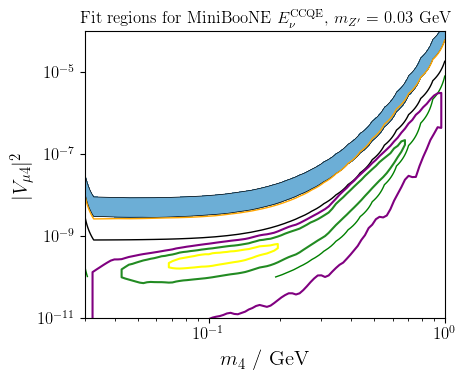

In [16]:
path = '../results/3p1_coupling_0.0008/'
path_data = path+f'5m_18d_20h_51m_15s_'
f = open(path_data+'chi2.dat', 'r')
header = f.readline().replace('# ', '').split()
data = pd.read_csv(f, sep='\s+', names=header, dtype=float)


mzprime = 0.03
data_enu = data[(data.mzprime == mzprime)]
# levels = [0,2.30,6.18,11.83,19.5,28]
levels = [200,600]

x = data_enu.m4.values
chi2 = 'chi2_mb_comb'
y = (data_enu.v_mu4.values) ** 2 
z = data_enu['mb_fhc_n_events']#(data_enu[chi2] - data_enu[chi2].min())
w = data_enu.decay_length.values

kwargs_interp = {'fine_gridx':40, 'fine_gridy':500, 'logx':True, 'logy': True}
X, Y, Z = pt2.interp_grid(x, y, z, **kwargs_interp)
X, Y, Z_sbnd = pt2.interp_grid(x, y, data_enu['sbnd_n_events'], **kwargs_interp)
X, Y, Z_microb = pt2.interp_grid(x, y, data_enu['microb_n_events'], **kwargs_interp)
X, Y, Z_icarus = pt2.interp_grid(x, y, data_enu['icarus_n_events'], **kwargs_interp)

fig, ax = pt.std_fig()

cs = ax.contourf(X,Y,Z,levels=levels,cmap='Blues_r')
cs2 = ax.contour(X,Y,Z,levels=levels,colors='black',linewidths=0.5)

# cs = ax.contourf(X,Y,np.log10(Z),levels=100,cmap='Blues_r')
# cs = ax.scatter(x,y,c=np.log10(z),cmap='Blues_r')
# plt.colorbar(cs)
cs2 = ax.contour(X, Y, Z_sbnd, levels=[1000], colors='orange',linewidths=1.0)
cs2 = ax.contour(X, Y, Z_microb, levels=[1000], colors='black',linewidths=1.0)
cs2 = ax.contour(X, Y, Z_icarus, levels=[1000], colors='green',linewidths=1.0)
ax.plot(x[np.argmin(z)],y[np.argmin(z)],color='orange',marker=marker1,markersize=12)


colors = {1: 'yellow', 3: 'forestgreen', 5: 'purple'} 
rescale = (1.6e-4 / 8e-4) ** 2 * (0.25 / 0.32) 
for i in [1,3,5]:
    m_low, c_low = np.genfromtxt(f"other_limits/Bertuzzo_et_al/low_{i}_sigma.dat", unpack=True)
    c_low = interp1d(m_low, c_low*rescale, bounds_error=False, fill_value=None)

    m_up, c_up = np.genfromtxt(f"other_limits/Bertuzzo_et_al/upper_{i}_sigma.dat", unpack=True)
    c_up = interp1d(m_up, c_up*rescale, bounds_error=False, fill_value=None)

    m_fit = np.geomspace(0.03, 1, 100)
    # ax.fill_between(m_fit, c_low(m_fit), c_up(m_fit), facecolor=colors[i], edgecolor='black', linewidth=1.5, zorder=2+1/i)
    ax.fill_between(m_fit, c_low(m_fit), c_up(m_fit), edgecolor=colors[i], facecolor='None', linewidth=1.5, zorder=2+1/i)


ax.set_title(r'Fit regions for MiniBooNE $E_\nu^{\mathrm{CCQE}}$, ' + r'$m_{Z^\prime} =$ ' + fr'{mzprime} GeV',fontsize=12)

xlabel = r'$m_4 \ /$ GeV'
ylabel = r'$|V_{\mu 4}|^2$'
marker1 = '*'
ax.set_xlabel(xlabel,fontsize=15)
ax.set_ylabel(ylabel,fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.03,X.max())

ax.set_ylim(coupl_boundaries[mzprime][0],coupl_boundaries[mzprime][1])

plot_minerva_limits(ax, rescale=rescale)

ax.annotate(r'$m_{Z^\prime} = $' + fr'{mzprime:.2f}', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12)

In [261]:
from DarkNews import GenLauncher
import DarkNews as dn
from fastbnb import fit_functions as ff

kwargs = {
    "m4": 0.1,
    "mzprime": 0.03,
    "Umu4": 1e-4,
    "UD4": 1/np.sqrt(2),
    "alphaD": 0.25,
    "epsilon": np.sqrt(137*2e-10),
    "neval": 1e4,
    "HNLtype": "majorana",
    "noHF": True,
    "pandas": False,
    "parquet": False,
    "loglevel": "WARNING",
    "sparse": 2,
    # "ratio_tau_to_mu": RATIO_CASE,
}

# 1. SIMULATIONS
MB_fhc_df = GenLauncher(
experiment="miniboone_fhc",
nu_flavors=["nu_mu"],
**kwargs,
).run()
MB_fhc_df_dirt = GenLauncher(
experiment="miniboone_fhc_dirt",
nu_flavors=["nu_mu"],
**kwargs,
).run()
# 2. LIFETIME OF HNL
dl = MB_fhc_df.attrs["N4_ctau0"]
MB_fhc_df = dn.MC.get_merged_MC_output(MB_fhc_df, MB_fhc_df_dirt)


MB_rhc_df = GenLauncher(
    experiment="miniboone_rhc",
    nu_flavors=["nu_mu_bar", "nu_mu"],
    **kwargs,
).run()
MB_rhc_df_dirt = GenLauncher(
    experiment="miniboone_rhc_dirt",
    nu_flavors=["nu_mu_bar", "nu_mu"],
    **kwargs,
).run()
MB_rhc_df = dn.MC.get_merged_MC_output(MB_rhc_df, MB_rhc_df_dirt)


No output format selected. No output will be saved.
No output format selected. No output will be saved.
Beware! Merging generation cases with different df.attrs['experiment']! Discarting the second (newest) case.
No output format selected. No output will be saved.
No output format selected. No output will be saved.
Beware! Merging generation cases with different df.attrs['experiment']! Discarting the second (newest) case.


In [262]:
from fastbnb import decayer
df_fhc_temp = decayer.decay_selection(
        MB_fhc_df, 0.00000001, "miniboone", weights="w_event_rate"
    )
df_fhc_temp.w_event_rate.sum()

541.538122628063

In [263]:
##############
# 6. MAIN OUTPUT -- TOTAL RATE AND CHI2

decay_l = dl/1e5

chi2s, events = ff.miniboone_rates_and_chi2(
    MB_fhc_df,
    MB_rhc_df,
    rescale=1,
    cut='circ1',
    decay_l=1e-10,
)


print(chi2s, events)

[29.827555626833107, 20.98206721469981, 65.28372949790845] [20.460664512631027, 7.666540569988799]
